# Build FX Volatility Surface

Construct an FX volatility surface to different terms using ATM volatility, risk reversals and strangles. The example is taken from the book by Iain Clarke (see Tables 3.3 and 3.4 of the book)

In [1]:
from financepy.finutils.FinDate import FinDate
from financepy.market.curves.FinFlatCurve import FinFlatCurve
from financepy.market.volatility.FinFXMktVolSurface import FinFXMktVolSurface
from financepy.market.volatility.FinFXMktVolSurface import FinFXATMMethod
from financepy.market.volatility.FinFXMktVolSurface import FinFXDeltaMethod

####################################################################
TEMPORARY MESSAGE: Welcome to FinancePy!
This program is distributed in the hope that it will be useful, but
WITHOUT ANY WARRANTY and without even the implied warranty of 
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. Furthermore,
this is an alpha version of FinancePy & so is in early development.
Users are requested to verify outputs and if any doubt is found 
users are requested to contact the author of FinancePy. 
###################################################################



In [2]:
valueDate = FinDate(10, 4, 2020)

In [3]:
forName = "EUR"
domName = "USD"
currencyPair = forName + domName
spotFXRate = 1.3465

In [4]:
forCCRate = 0.03460  # EUR
domCCRate = 0.02940  # USD

In [5]:
domDiscountCurve = FinFlatCurve(valueDate, domCCRate)
forDiscountCurve = FinFlatCurve(valueDate, forCCRate)

In [6]:
tenors = ['1M', '2M', '3M', '6M', '1Y', '2Y']
atmVols = [21.00, 21.00, 20.750, 19.400, 18.250, 17.677]
marketStrangle25DeltaVols = [0.65, 0.75, 0.85, 0.90, 0.95, 0.85]
riskReversal25DeltaVols = [-0.20, -0.25, -0.30, -0.50, -0.60, -0.562]

In [7]:
notionalCurrency = forName

In [8]:
atmMethod = FinFXATMMethod.FWD_DELTA_NEUTRAL
deltaMethod = FinFXDeltaMethod.SPOT_DELTA

In [9]:
fxMarket = FinFXMktVolSurface(valueDate,
                              spotFXRate,
                              currencyPair,
                              notionalCurrency,
                              domDiscountCurve,
                              forDiscountCurve,
                              tenors,
                              atmVols,
                              marketStrangle25DeltaVols,
                              riskReversal25DeltaVols,
                              atmMethod,
                              deltaMethod)

In [10]:
fxMarket.checkCalibration()

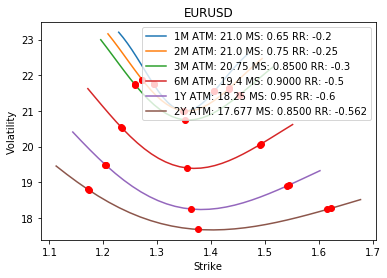

In [11]:
fxMarket.plotVolCurves()

### Extracting Information from Volatility Surface

In [12]:
fxMarket._F0T

array([1.34592501, 1.34533112, 1.34475663, 1.3429964 , 1.33952099,
       1.33257815])

In [13]:
fxMarket._parameters

array([[-1.56039704,  0.02647804,  0.46553037],
       [-1.5601784 ,  0.03659353,  0.53522534],
       [-1.57191861,  0.04678967,  0.6110797 ],
       [-1.63829451,  0.07768793,  0.69679638],
       [-1.69812542,  0.10860449,  0.80403923],
       [-1.72842749,  0.1308243 ,  0.81518729]])

We can extract information from the volatility surface

In [14]:
K = 1.4

The zeroth curve is the 1M volatility smile

In [15]:
fxMarket.volFunction(K,0)

0.2145457780840291

The fifth curve is the 2Y volatility smile

In [16]:
fxMarket.volFunction(K,5)

0.17663462421851928

Copyright (c) 2020 Dominic O'Kane